In [ ]:
import csv
import numpy as np

In [ ]:
def last_layer(y):
  yret=[]
  for yi in y:
    if yi<=0.5:
      yret.append(0)
    else:
      yret.append(1)
  return yret



In [ ]:
def error_layer(ypred,yact):
  err=0
  for i in range(len(ypred)):
    if(ypred[i]!=yact[i]):
      err+=1
  return (err/len(ypred))*100



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# file=open('/content/drive/MyDrive/wsi_data/data.csv')

In [ ]:
# csvreader=csv.reader(file)


In [ ]:
# rows=[]
# for row in csvreader:
#   rows.append(row)

In [ ]:
# print(len(rows[0]))
# print(len(rows))
# print(rows)

In [ ]:
import random
#r = []
#for i in range(20000):
#  a = []
#  for j in range(12):
#    integer = random.randint(0, 1)
#    a.append(integer)
#
#  r.append(a)

r = np.random.randint(2,size=(12,200000))
r = np.transpose(r)
#r = r.flatten()
print(r)
print("-------------")
print(r[0])



[[0 0 1 ... 1 1 0]
 [1 1 0 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 0 ... 1 1 1]
 [1 0 1 ... 1 0 0]
 [0 0 1 ... 1 1 1]]
-------------
[0 0 1 0 0 1 0 0 0 1 1 0]


In [ ]:

print(np.shape(r))

(200000, 12)


In [ ]:
data=r
# for row in range(len(rows)):
#   ll=[]
#   for col in range(len(rows[0])):
#     if(rows[row][col]=='0'):
#       ll.append(0)
#       ll.append(0)
#     elif(rows[row][col]=='1'):
#       ll.append(0)
#       ll.append(1)
#     elif(rows[row][col]=='2'):
#       ll.append(1)
#       ll.append(0)
#     elif(rows[row][col]=='3'):
#       ll.append(1)
#       ll.append(1)
#   data.append(ll)




In [ ]:
# data = rows

In [ ]:
# 80:20 split
train=data[0:160000]
test=data[160000:200000]
train=np.asarray(train,dtype='float32')
test=np.asarray(test,dtype='float32')

In [ ]:
print(np.shape(train))
print("----------")
print(test)


(160000, 12)
----------
[[1. 1. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
def gaussian_noise(input_layer, std):
    noise = tf.random.normal(shape=tf.shape(input_layer), mean=0.0, stddev=std, dtype=tf.float32)
    return input_layer + noise

a='tanh'
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(units=12, activation=a),
      layers.Dense(units=32 , activation=a),
      layers.Dense(units=32 , activation=a),
      layers.Dense(units=32 , activation=a),
      layers.Dense(units=32 , activation=a),
      layers.Dense(units=8, activation=a),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(units=8, activation=a),
      layers.Dense(units=48, activation=a),
      layers.Dense(units=48, activation=a),
      layers.Dense(units=48, activation=a),
      layers.Dense(units=48, activation=a),
      layers.Dense(units=48, activation=a),
      layers.Dense(units=12, activation='sigmoid'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    print(np.shape(encoded))
    print("--------------")
    print(encoded)
    noise_encoded=gaussian_noise(encoded,0.002)
    decoded = self.decoder(noise_encoded)
   # final_output = last_layer(decoded)
    return decoded
    print("------------")
    # print(decoded)

autoencoder = Autoencoder()

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(),metrics=['mean_absolute_error','accuracy'])



In [ ]:
import time

# starting time
start = time.time()
history=autoencoder.fit(train, train,epochs=40,batch_size=64,shuffle=True,validation_data=(test, test))

end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

Epoch 1/40
(64, 8)
--------------
Tensor("autoencoder/sequential/dense_5/Tanh:0", shape=(64, 8), dtype=float32)
(64, 8)
--------------
Tensor("autoencoder/sequential/dense_5/Tanh:0", shape=(64, 8), dtype=float32)
2500/2500 [==============================] - ETA: 0s - loss: 0.3897 - mean_absolute_error: 0.2827 - accuracy: 0.1547(64, 8)
--------------
Tensor("autoencoder/sequential/dense_5/Tanh:0", shape=(64, 8), dtype=float32)
2500/2500 [==============================] - 16s 5ms/step - loss: 0.3897 - mean_absolute_error: 0.2827 - accuracy: 0.1547 - val_loss: 0.2495 - val_mean_absolute_error: 0.1836 - val_accuracy: 0.1685
Epoch 2/40
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2173 - mean_absolute_error: 0.1577 - accuracy: 0.1702 - val_loss: 0.1929 - val_mean_absolute_error: 0.1386 - val_accuracy: 0.1805
Epoch 3/40
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1705 - mean_absolute_error: 0.1240 - accuracy: 0.1678 - val_loss: 0.1469 - val_mean_

In [ ]:
print(autoencoder)
print(autoencoder._init_)


AttributeError: ignored

[0.3151634633541107, 0.22805744409561157, 0.1712631732225418, 0.1341165006160736, 0.09934718906879425, 0.06348005682229996, 0.0361974872648716, 0.01704563945531845, 0.007987507618963718, 0.003470492549240589, 0.0014338854234665632, 0.0006081638275645673, 0.0002644218329805881, 0.0002935000811703503, 0.00010546128760324791, 6.1027145420666784e-05, 3.356103479745798e-05, 1.763084947015159e-05, 9.188112017000094e-06, 4.9743753152142745e-06, 2.8918468615302118e-06, 7.615763752255589e-05, 6.406447937479243e-06, 3.351833356646239e-06, 2.270961203976185e-06, 1.7021200164890615e-06, 1.2927880561619531e-06, 9.688802720120293e-07, 7.414080869239115e-07, 5.897890673622896e-07, 4.839908456233388e-07, 4.052917574881576e-07, 5.618850627797656e-05, 2.3836639684304828e-06, 1.1382355751266005e-06, 6.486727670562686e-07, 4.2561140389807406e-07, 3.2274527939080144e-07, 2.6913863848676556e-07, 2.32933714983119e-07]
[0.25101298093795776, 0.2079237848520279, 0.15051107108592987, 0.11799570173025131, 0.08012

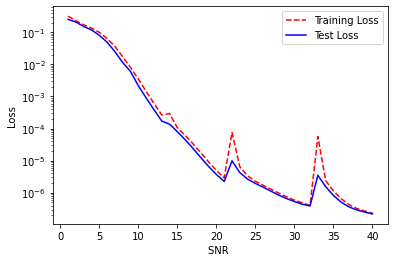

In [ ]:
import matplotlib.pyplot as plt
training_loss = history.history['mean_absolute_error']
test_loss = history.history['val_mean_absolute_error']
epoch_count = range(1, len(training_loss) + 1)

print(training_loss)
print(test_loss)
# Visualize loss history
plt.semilogy(epoch_count, training_loss, 'r--')
plt.semilogy(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('SNR ')
plt.ylabel('Loss')
plt.show();

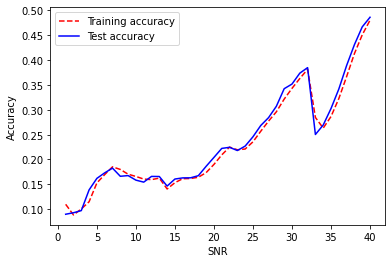

In [ ]:
import matplotlib.pyplot as plt
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
import matplotlib as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255
print(train_x)
print(val_x)
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='relu', input_shape=(784,)))
autoencoder.add(Dense(256,  activation='relu'))
autoencoder.add(Dense(128,  activation='relu'))
autoencoder.add(Dense(64,  activation='relu'))
autoencoder.add(Dense(32,  activation='relu'))
autoencoder.add(Dense(8,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(32,  activation='relu'))
autoencoder.add(Dense(64,  activation='relu'))
autoencoder.add(Dense(128,  activation='relu'))
autoencoder.add(Dense(256,  activation='relu'))
autoencoder.add(Dense(512,  activation='relu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(loss='mean_squared_error', optimizer = opt)
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)
# bottleneck representation
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.show(x_test_noisy[1].reshape(28, 28))
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-6](encoded_input)
decoder = autoencoder.layers[-5](decoder)
decoder = autoencoder.layers[-4](decoder)
decoder = autoencoder.layers[-3](decoder)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)

decoder = Model(encoded_input, decoder)


11501568/11490434 [==============================] - 0s 0us/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/10
59/59 [==============================] - 4s 25ms/step - loss: 0.0927 - val_loss: 0.0669
Epoch 2/10
59/59 [==============================] - 1s 23ms/step - loss: 0.0637 - val_loss: 0.0616
Epoch 3/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0540 - val_loss: 0.0471
Epoch 4/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0437 - val_loss: 0.0401
Epoch 5/10
59/59 [==============================] - 1s 22ms/step - loss: 0.0379 - val_loss: 0.0355
Epoch 6/10
59/59 [==============================] - 2s 26ms/step - loss: 0.0346 - val_loss: 0.0333
Epoch 7/10
59/59 [===========

AttributeError: ignored

In [ ]:
plt.plot(trained_model.history['loss'], label='train')
plt.plot(trained_model.history['val_loss'], label='test')
plt.legend()
plt.show()